**Author : Barkha Verma**

**Data Science and Business Analytics internship**

**The Sparks Foundation GRIP**

**Batch : December 2020**

**Task#6 Prediction using decision tree alogrithm.**

**Create the decision tree classifier and visualize it graphically.**

**The purpose is if we feed any new data to this classifier,it would be able to predict the right class accordningly**

In [99]:
# we will import important libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# we will import the dataset 
data = pd.read_csv("Iris.csv")

In [101]:
# we will print the first five line of our dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
# we will check if there is any NAN value or not
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

from above we can see that there is not any nan value

In [103]:
# we will check shape of our dataset
data.shape

(150, 6)

from above we can see that there  is 150 rows and 6 columns

In [104]:
# we will print names of columns of our dataset
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [105]:
# here we are showing how many examples we have of each species
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [106]:
# we will print the info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [107]:
# we will print the summary of our dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Finding correlation

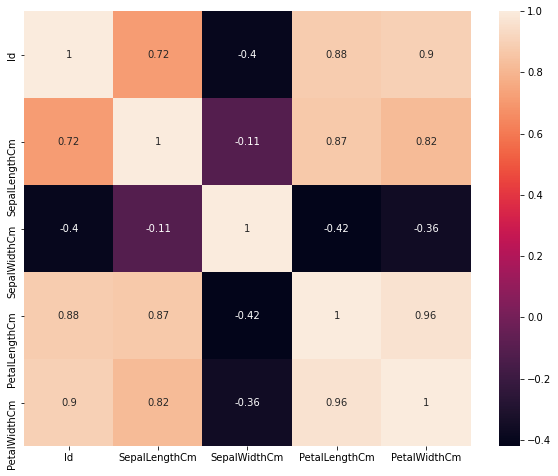

In [108]:
# We will find correlation between our dataset
plt.figure(figsize=(10,8))
corrMatrix=data.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()


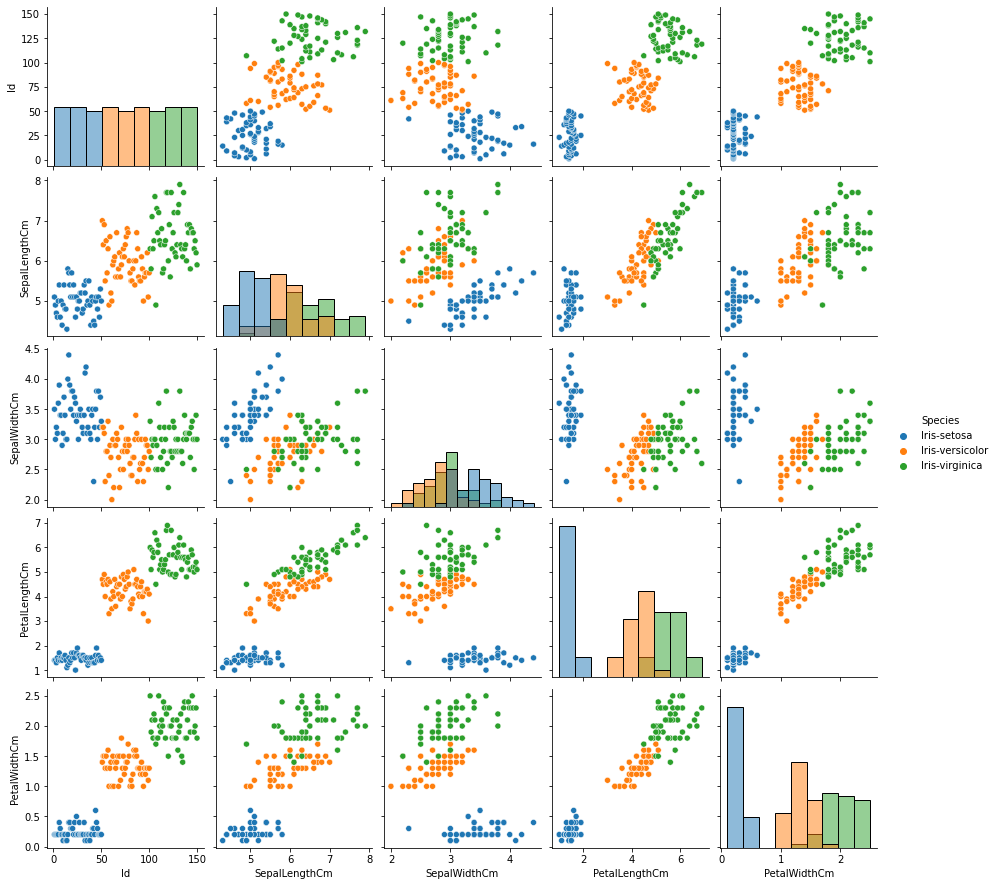

In [109]:
# we will plot pairplot which will shows the bivariate relation between each pair of features of our dataset
sns.pairplot(data, hue="Species", diag_kind="hist")
plt.show()

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
data["Species"]=le.fit_transform(data["Species"])

In [112]:
# we will divide data into labels and attributes
x = data.iloc[:,[1,2,3]]
y= data.iloc[:,-1]

**we will split data into traning and testing set**

In [113]:
# we will split data into traning and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Creating and Training the model**

In [114]:
# we will train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [115]:
# we will train the model
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [116]:
# we will predict the test set 
y_pred = classifier.predict(x_test)

In [117]:
# we will print the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


In [118]:
# we will print accuracy of our model
accuracy_score(y_test, y_pred)

0.9473684210526315

**Visualization of the decision tree**

In [119]:
# we will import tree
from sklearn import tree

Text(0.5, 1.0, 'Decision tree')

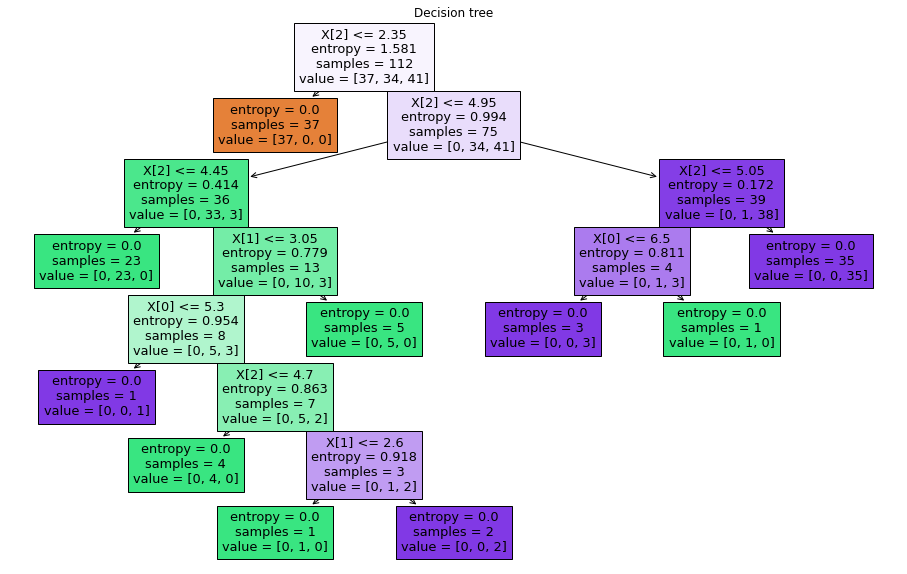

In [120]:
plt.figure(figsize=(16,10))
tree.plot_tree(classifier,filled=True)
plt.title("Decision tree")